
# (CIFAR-10) USING CNNs



- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html




```

```

# STEP #1: IMPORT LIBRARIES/DATASETS

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
#since i am having trouble with ssl cert verification of the data providing website I used this


In [4]:
#importing data from keras
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test)=cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[9]


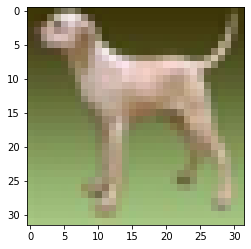

In [8]:
i= 9999
plt.imshow(X_train[i])
print(y_train[1])

# STEP #3: DATA PREPARATION

In [9]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [10]:
number_cat = 10

In [11]:
#converting categories into array format
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [14]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:

X_train=X_train/255
X_test=X_test/255


In [16]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
Input_shape=X_train.shape[1:]

# STEP #4: TRAIN THE MODEL

In [19]:
#importing CNN libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

In [20]:
#defining the model
model=Sequential()
model.add(Conv2D(filters= 64, kernel_size=(3,3), activation='relu', input_shape= Input_shape))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size =(3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])


In [24]:
history = model. fit(X_train, y_train, batch_size=32, epochs=12, shuffle = True)

Epoch 1/12
1563/1563 [==============================] - 81s 52ms/step - loss: 0.5541 - accuracy: 0.8043
Epoch 2/12
1563/1563 [==============================] - 83s 53ms/step - loss: 0.5215 - accuracy: 0.8178
Epoch 3/12
1563/1563 [==============================] - 83s 53ms/step - loss: 0.4976 - accuracy: 0.8259
Epoch 4/12
1563/1563 [==============================] - 93s 60ms/step - loss: 0.4690 - accuracy: 0.8349
Epoch 5/12
1563/1563 [==============================] - 92s 59ms/step - loss: 0.4522 - accuracy: 0.8390
Epoch 6/12
1563/1563 [==============================] - 85s 54ms/step - loss: 0.4266 - accuracy: 0.8499
Epoch 7/12
1563/1563 [==============================] - 84s 54ms/step - loss: 0.4158 - accuracy: 0.8554
Epoch 8/12
1563/1563 [==============================] - 85s 54ms/step - loss: 0.3968 - accuracy: 0.8614
Epoch 9/12
1563/1563 [==============================] - 85s 54ms/step - loss: 0.3862 - accuracy: 0.8673
Epoch 10/12
1563/1563 [==============================] - 85s 54m

# STEP #5: EVALUATE THE MODEL

In [41]:
evaluation = model.evaluate(X_test, y_test)
print('Test Accuracy:{} %'.format(evaluation[1]*100.0))


313/313 [==============================] - 2s 7ms/step - loss: 0.9517 - accuracy: 0.7261
Test Accuracy:72.61000275611877 %


In [42]:
print("loss : " + str(evaluation[0]*100.0) +" Accuracy : " + str(evaluation[1]*100.0))

loss : 95.17102241516113 Accuracy : 72.61000275611877
